In [1]:
.libPaths('/disk1/wenqing/anaconda3/envs/wq_R4.2/lib/R/library')

In [3]:
library(ggpubr)
library(ggplot2)
library(dplyr)

Loading required package: ggplot2


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [63]:
####计算asd样本gene ediitng index的相关性
gene_ei_10X <- as.data.frame(read.table("/disk1/wenqing/tmp_data/pbmc/GEI/over0/10X/regular_EI_inGene_over0.txt"))
gene_ei_s2 <- as.data.frame(read.table("/disk1/wenqing/tmp_data/pbmc/GEI/over0/S2/regular_EI_inGene_over0.txt"))


In [64]:
threshods <- 0
threshods

[1] 0

In [65]:
for(one in threshods){
    sub_gene_ei_10X <- gene_ei_10X[which(gene_ei_10X[,1] > one),]
    sub_gene_ei_s2 <- gene_ei_s2[which(gene_ei_s2[,1] > one),]
    names(sub_gene_ei_10X) <- rownames(gene_ei_10X)[which(gene_ei_10X[,1] > one)]
    names(sub_gene_ei_s2) <- rownames(gene_ei_s2)[which(gene_ei_s2[,1] > one)]

    #head(names(sub_gene_ei_19))
    shared_genes <- intersect(names(sub_gene_ei_10X),names(sub_gene_ei_s2))

    cor_dat_10X <- sub_gene_ei_10X[shared_genes]
    cor_dat_s2 <- sub_gene_ei_s2[shared_genes]

    dat1 <- as.data.frame(cbind(cor_dat_10X,cor_dat_s2))
    colnames(dat1) <- c('TenX',"Smart_seq2")

    cor_res <- cor.test(dat1[,1],dat1[,2])
    print(paste0("threshod is: ",one))
    print(cor_res$estimate)
    print(cor_res$p.value)
    
}


[1] "threshod is: 0"
      cor 
0.4248227 
[1] 3.663868e-204


In [17]:
table(gene_ei_10X > 0.01)
table(gene_ei_s2 > 0.01)



FALSE  TRUE 
 5969  2829 


FALSE  TRUE 
 5379   726 

In [67]:
dim(dat1)

[1] 4673    2

In [44]:
a <- cor.test(dat1[,1],dat1[,2])

In [45]:
print(a)


	Pearson's product-moment correlation

data:  dat1[, 1] and dat1[, 2]
t = 32.149, df = 4569, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.4055726 0.4528653
sample estimates:
      cor 
0.4295134 



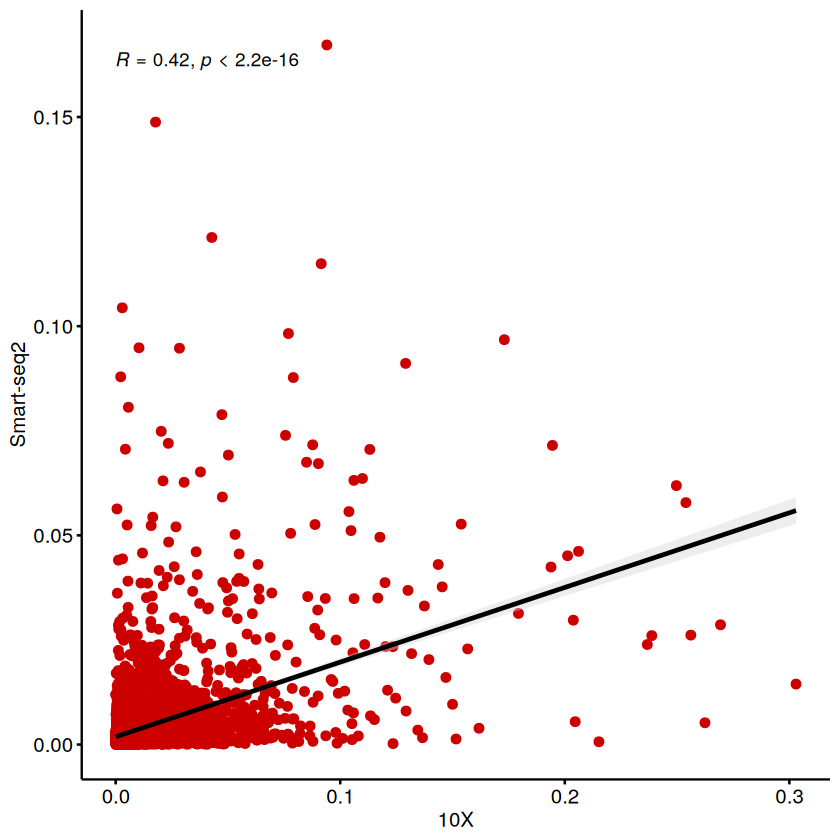

In [66]:
# 运行ggscatter函数
ggscatter(dat1, x = "TenX", y = "Smart_seq2", 
          color = "red3", fill = "lightgray",
          add = "reg.line", conf.int = TRUE, 
          add.params = list(color = "black", fill = "lightgray"),
          cor.coef = TRUE,
          cor.coeff.args = list(method = "pearson"),
          xlab='10X', ylab='Smart-seq2')


In [ ]:
p_lst <- list()
p_lst[[2]] <- p1
p_lst[[1]] <- p2

pdf('/disk1/wenqing/tmp_data/ASD/asd_male_pfc/onecellVsBulk_gene_ei_corr.pdf',height = 10,width=17)
do.call("ggarrange", c(p_lst, ncol=2, nrow=1))
dev.off()

png 
  2

In [56]:
overlapped_genes <- read.table("/disk1/wenqing/tmp_data/pbmc/overlapped_genesIn2Plats.txt")$V1
head(overlapped_genes)

[1] "AAGAB" "AAK1"  "AARS"  "AATF"  "ABAT"  "ABCA1"

In [58]:
setdiff(overlapped_genes,shared_genes)

[1] "ABCA1"         "AC002116.7"    "AC006547.13"   "AC007040.11"  
  [5] "AC019118.2"    "AC133680.1"    "AFMID"         "ATF7IP"       
  [9] "ATG4D"         "C15orf60"      "CACNG3"        "CALD1"        
 [13] "CBWD5"         "CCDC117"       "CCDC65"        "CD99P1"       
 [17] "CEP112"        "CEP164P1"      "CEP97"         "CLIP1"        
 [21] "CROCCP2"       "CYP51A1"       "DAPK2"         "DOCK7"        
 [25] "DPF2"          "DPP6"          "DSE"           "EHBP1"        
 [29] "ELN"           "EMBP1"         "EPHA6"         "EYA2"         
 [33] "FKBP11"        "FLCN"          "GABRG3"        "GINS4"        
 [37] "GPR124"        "HECTD1"        "HIPK3"         "IFT80"        
 [41] "ISCA1"         "LCORL"         "LRP2BP"        "LRRD1"        
 [45] "MAN2A2"        "MARVELD2"      "MLLT3"         "MSRA"         
 [49] "MYO15A"        "NFIC"          "NPIPB15"       "NTN1"         
 [53] "OPA1"          "PDE4B"         "PIPOX"         "PLEKHA5"      
 [57] "PPP1R42"       "PTK7"          "PTPRD"         "PTPRM"        
 [61] "RAPGEF4"       "RASGRP2"       "RIN2"          "RP11-111M22.2"
 [65] "RP11-115J16.1" "RP11-154D17.1" "RP11-360L9.4"  "RP11-360L9.7" 
 [69] "RP11-432B6.3"  "RP11-492D6.3"  "RP11-624L4.1"  "RP11-714G18.1"
 [73] "RP11-782C8.1"  "RP11-782C8.2"  "RP1-27O5.3"    "RPN1"         
 [77] "RPS27L"        "SEC23IP"       "SH2D4A"        "SKA2"         
 [81] "SORCS3"        "SPRTN"         "ST3GAL2"       "SYNC"         
 [85] "SYNJ1"         "SYT14"         "TANC2"         "TCEB3"        
 [89] "TCF3"          "TDRD10"        "TESK2"         "TMEM156"      
 [93] "TMEM183A"      "TTC39B"        "TTI2"          "USP32"        
 [97] "WDR45"         "WDR92"         "WWC3"          "ZBTB7C"       
[101] "ZNF630"        "ZSWIM7"

In [60]:
find_gene_res_num <- function(x){
    gene <- strsplit(uniq_gene_region[x],"_")[[1]][4]
    res_num <- sum(dat$V8[dat$V4==gene])
    return(res_num)
}

In [62]:
    dat <- read.table("/disk1/wenqing/tmp_data/pbmc/GEI/over0/S2/geneWithRegular_res.txt")

    dat$V10 <- paste0(dat$V1,"_",dat$V2,"_",dat$V3,"_",dat$V4)
    #head(dat)
    uniq_gene_region <- unique(dat$V10)
    #length(uniq_gene_region)

    gene_res_num <- apply(as.matrix(1:length(uniq_gene_region)),1,find_gene_res_num)


    new_dat_col1 <- apply(as.matrix(1:length(uniq_gene_region)),1,function(x) {col1 <- strsplit(uniq_gene_region[x],"_")[[1]][1]})
    new_dat_col2 <- apply(as.matrix(1:length(uniq_gene_region)),1,function(x) {col1 <- strsplit(uniq_gene_region[x],"_")[[1]][2]})
    new_dat_col3 <- apply(as.matrix(1:length(uniq_gene_region)),1,function(x) {col1 <- strsplit(uniq_gene_region[x],"_")[[1]][3]})
    new_dat_col4 <- apply(as.matrix(1:length(uniq_gene_region)),1,function(x) {col1 <- strsplit(uniq_gene_region[x],"_")[[1]][4]})
    new_dat_col5 <- gene_res_num
    new_dat <- as.data.frame(cbind(new_dat_col1,new_dat_col2,new_dat_col3,new_dat_col4,new_dat_col5))
    write.table(new_dat,"/disk1/wenqing/tmp_data/pbmc/GEI/over0/S2/geneWzRes_ad.txt",quote=F,col.names=F,row.names=F,sep='\t')


In [2]:
#######计算3'bias是否存在
transcriptRes_5end <- read.table("/disk1/wenqing/tmp_data/pbmc/distri_bias_test/transcriptWzRes_5end.txt")
transcriptRes_3end <- read.table("/disk1/wenqing/tmp_data/pbmc/distri_bias_test/transcriptWzRes_3end.txt")

In [3]:
rownames(transcriptRes_5end) <- transcriptRes_5end$V2
rownames(transcriptRes_3end) <- transcriptRes_3end$V2

In [4]:
shared_region <- intersect(transcriptRes_5end$V2,transcriptRes_3end$V2)
length(shared_region)

[1] 1027

In [5]:
sub_dat_5end <- transcriptRes_5end[shared_region,1]
sub_dat_3end <- transcriptRes_3end[shared_region,1]

In [6]:
var.test(sub_dat_5end, sub_dat_3end) 


	F test to compare two variances

data:  sub_dat_5end and sub_dat_3end
F = 0.82697, num df = 1026, denom df = 1026, p-value = 0.002369
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 0.7316689 0.9346954
sample estimates:
ratio of variances 
         0.8269749 


In [7]:
t.test(sub_dat_5end, sub_dat_3end, var.equal = FALSE)  


	Welch Two Sample t-test

data:  sub_dat_5end and sub_dat_3end
t = -5.677, df = 2033.8, p-value = 1.568e-08
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -8.435617 -4.103818
sample estimates:
mean of x mean of y 
 11.98832  18.25803 


[1] 2443

,region,scaled_res_num
,<chr>,<dbl>
1,5end,1.125
2,5end,5.625
3,5end,14.000
4,5end,2.000
5,5end,66.125
6,5end,4.250


[1] 10.75235

[1] 17.29902

Warning message:
“Removed 86 rows containing non-finite values (`stat_boxplot()`).”
Warning message:
“Removed 86 rows containing non-finite values (`stat_summary()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_text()`).”


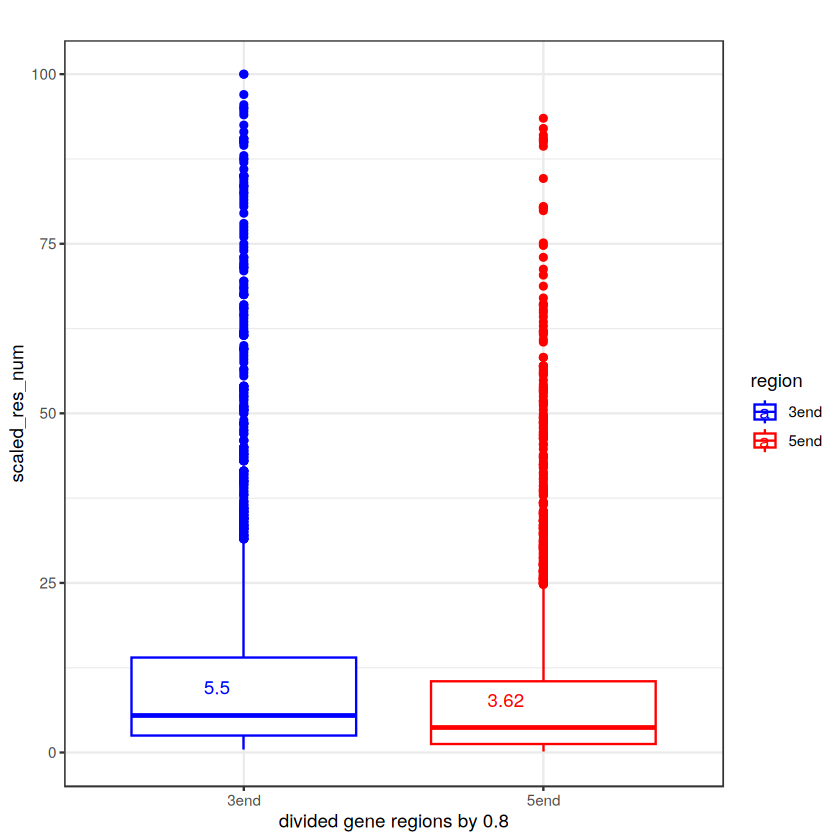

In [7]:
#######计算3'bias是否存在
#for(one in c(0.6,0.7,0.8)){
    one=0.8
    transcriptRes_5end <- read.table(paste0("/disk1/wenqing/tmp_data/pbmc/distri_bias_test/gencode/10X/res_Ver2/transcriptWzRes_5end.",one,".txt"))
    transcriptRes_3end <- read.table(paste0("/disk1/wenqing/tmp_data/pbmc/distri_bias_test/gencode/10X/res_Ver2/transcriptWzRes_3end.",one,".txt"))
    rownames(transcriptRes_5end) <- transcriptRes_5end$V2
    rownames(transcriptRes_3end) <- transcriptRes_3end$V2
    shared_region <- intersect(transcriptRes_5end$V2,transcriptRes_3end$V2)
    length(shared_region)
    sub_dat_5end <- transcriptRes_5end[shared_region,1]/(one*10)
    sub_dat_3end <- transcriptRes_3end[shared_region,1]/((1-one)*10)

    dat1 <- as.data.frame(cbind(x=c(rep('5end',times=length(sub_dat_5end)),rep('3end',times=length(sub_dat_3end))),
                            y=c(sub_dat_5end,sub_dat_3end)))
    colnames(dat1) <- c('region','scaled_res_num')
    dat1$scaled_res_num <- as.numeric(dat1$scaled_res_num)
    head(dat1)

    test_result <- wilcox.test(sub_dat_5end,sub_dat_3end)  
    mean(sub_dat_5end)
    mean(sub_dat_3end)
    # 根据p值确定显著性水平，并设置相应的符号  
    signif_symbol <- ifelse(test_result$p.value < 0.001, "***",   
                            ifelse(test_result$p.value < 0.01, "**",   
                            ifelse(test_result$p.value < 0.05, "*", ""))) 
                                
    
    # 创建箱线图  
    p <- ggplot(data = dat1,   
            aes(x = region, y = scaled_res_num, color = region)) +  
    geom_boxplot() + 
    stat_summary(fun = median, # 计算中位数  
               geom = "text", # 使用text几何对象来添加标签  
               aes(label = round(..y..,2)), # 使用计算出的中位数作为标签  
               vjust = -1.5, # 垂直调整标签位置 
               hjust = 1.5,
               position = position_dodge(width = 0.75)) +
    theme(panel.background = element_blank(),        
        axis.text.x = element_text(size=10,color = 'black'),
        axis.title.y = element_text(size = 14,color = 'black'),
        axis.text.y = element_text(size = 12,color = 'black'),
        axis.ticks.y = element_blank(),
        plot.title = element_text(hjust = .5),
        legend.position = "none") +
    theme_bw() +
    scale_fill_manual(values = c('blue','red')) + # 设置箱体填充颜色  
    scale_colour_manual(values = c('blue','red')) + # 设置箱体边框颜色，这里与填充颜色相同  
    labs(title = "", x = paste0("divided gene regions by ",one), y = "scaled_res_num") +  
    #theme_minimal()  +
    ylim(0,100)
    
    # 在箱线图上添加显著性符号 
     
    p1 <- p + annotate("text", x = 1.5, y = max(c(sub_dat_5end, sub_dat_3end)) + 1,   
                label = signif_symbol,   
                size = 7, hjust = 0)
    p1
    #ggsave(paste0("/disk1/wenqing/tmp_data/pbmc/distri_bias_test/gencode/10X/compare_res_",one,".png"), plot = p1, width = 8, height = 6, dpi = 300)



In [86]:

    shapiro.test(sub_dat_5end)
    shapiro.test(sub_dat_3end)
    bartlett.test(list(sub_dat_5end,sub_dat_3end))



	Shapiro-Wilk normality test

data:  sub_dat_5end
W = 0.53315, p-value < 2.2e-16



	Shapiro-Wilk normality test

data:  sub_dat_3end
W = 0.5417, p-value < 2.2e-16



	Bartlett test of homogeneity of variances

data:  list(sub_dat_5end, sub_dat_3end)
Bartlett's K-squared = 4.4874, df = 1, p-value = 0.03414


In [22]:
###检查5end和3end的长度是否有明显的区别
length_5end <- read.table("/disk1/wenqing/tmp_data/gtf_files/refseq/transcript5end_region_length.txt")$V1
length_3end <- read.table("/disk1/wenqing/tmp_data/gtf_files/refseq/transcript3end_region_length.txt")$V1

In [23]:
quantile(length_5end)
mean(length_5end)
quantile(length_3end)
mean(length_3end)


0%        25%        50%        75%       100% 
      1.00    1251.25    6570.50   28608.00 1885730.00

[1] 33401.23

0%        25%        50%        75%       100% 
     19.00    3019.75   13316.00   42021.75 1093127.00

[1] 42068.61

In [26]:
#######
gene_bed <- read.table("/disk1/wenqing/tmp_data/gene.bed")
colnames(gene_bed) <- c('chr','start','end','name')
head(gene_bed)

,chr,start,end,name
,<chr>,<int>,<int>,<chr>
1,chr1,11868,14412,DDX11L1
2,chr1,14362,29806,WASH7P
3,chr1,29553,31109,MIR1302-11
4,chr1,34553,36081,FAM138A
5,chr1,52472,54936,OR4G4P
6,chr1,62947,63887,OR4G11P


In [46]:
for(percent in c(0.5,0.6,0.7,0.8)){
    new_5end <- round(gene_bed$start+(gene_bed$end-gene_bed$start)*percent)
    new_3end <- new_5end+1

    region_5end <- cbind(gene_bed$chr,gene_bed$start,new_5end,gene_bed$name)
    region_3end <- cbind(gene_bed$chr,new_3end,gene_bed$end,gene_bed$name)
    write.table(region_5end,paste0("/disk1/wenqing/tmp_data/gencode_5end.",percent,".bed"),quote=F,sep='\t',col.names=F,row.names=F)
    write.table(region_3end,paste0("/disk1/wenqing/tmp_data/gencode_3end.",percent,".bed"),quote=F,sep='\t',col.names=F,row.names=F)
}